**Connecting or Mounting to Google drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Required Libraries**

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, Flatten, MaxPool2D, Conv2D, Reshape, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.utils import Sequence
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
img_width, img_height = 224, 224

**Path of the Directory**

In [7]:
print(os.listdir("/content/drive/MyDrive/real_and_fake_face_detection/real_and_fake_face"))

['training_real', 'training_fake']


**Fake and Real Images paths**

In [8]:
real = "/content/drive/MyDrive/real_and_fake_face_detection/real_and_fake_face/training_real"
fake = "/content/drive/MyDrive/real_and_fake_face_detection/real_and_fake_face/training_fake"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

**Dataset Path**

In [9]:
dataset_path = "/content/drive/MyDrive/real_and_fake_face_detection/real_and_fake_face"

**Importing Image loding and generating Libraries**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

**Plotting the Real and Fake Images**

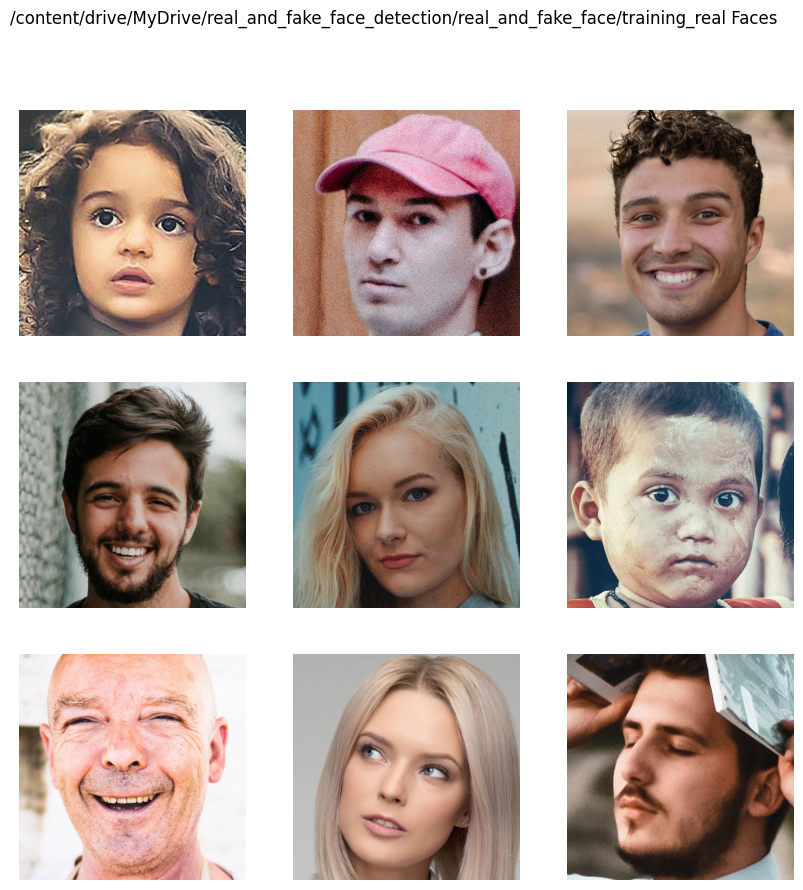

In [11]:
def plot_img(dataset_path, set_):
    dir_ = os.path.join(dataset_path, 'train', set_)
    k = 0
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    fig.suptitle(set_ + 'Faces')
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

plot_img(dataset_path, '/content/drive/MyDrive/real_and_fake_face_detection/real_and_fake_face/training_real').show()

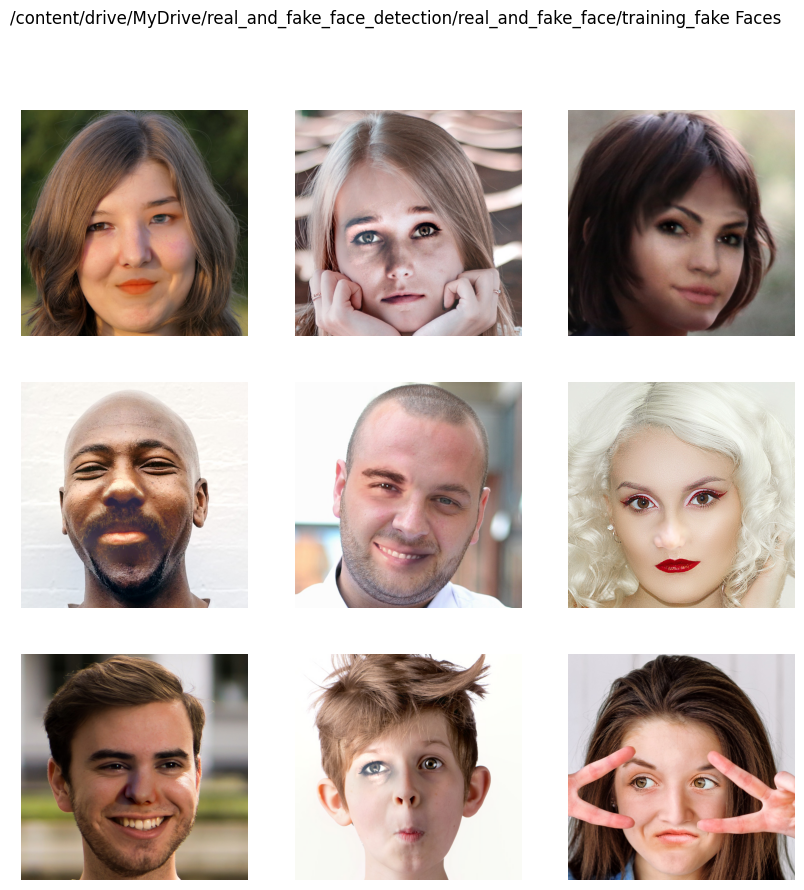

In [12]:
plot_img(dataset_path, '/content/drive/MyDrive/real_and_fake_face_detection/real_and_fake_face/training_fake').show()

**Data Augmentation**

In [13]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.2)

In [14]:
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=32,
                                          subset="training")

Found 1673 images belonging to 2 classes.


In [15]:
val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 418 images belonging to 2 classes.


**MobilenetV2**

In [16]:
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(224,224,3))

9406464/9406464 [==============================] - 1s 0us/step


In [17]:
tf.keras.backend.clear_session()

model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    Dense(2, activation = "softmax")])

model.layers[0].trainable = False

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

**Scheduling Epoch or call backs**

In [18]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

**Runnig Epoch**

In [19]:
hist = model.fit(train,
                    epochs=30,
                    callbacks=[lr_callbacks],
                    validation_data=val)

Epoch 1/30
53/53 [==============================] - 830s 15s/step - loss: 0.8605 - accuracy: 0.5792 - val_loss: 0.9126 - val_accuracy: 0.4880 - lr: 0.0010
Epoch 2/30
53/53 [==============================] - 23s 433ms/step - loss: 0.6200 - accuracy: 0.6904 - val_loss: 0.8832 - val_accuracy: 0.4761 - lr: 0.0010
Epoch 3/30
53/53 [==============================] - 23s 430ms/step - loss: 0.5406 - accuracy: 0.7316 - val_loss: 1.0736 - val_accuracy: 0.4976 - lr: 0.0010
Epoch 4/30
53/53 [==============================] - 22s 410ms/step - loss: 0.4581 - accuracy: 0.7794 - val_loss: 0.9668 - val_accuracy: 0.5167 - lr: 1.0000e-04
Epoch 5/30
53/53 [==============================] - 23s 427ms/step - loss: 0.4103 - accuracy: 0.8105 - val_loss: 0.9145 - val_accuracy: 0.5335 - lr: 1.0000e-04
Epoch 6/30
53/53 [==============================] - 22s 411ms/step - loss: 0.3867 - accuracy: 0.8285 - val_loss: 0.9710 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 7/30
53/53 [==============================] - 2

**Plotting Graph**

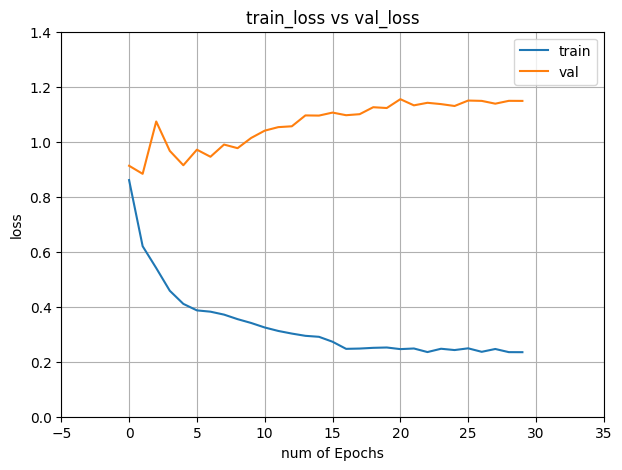

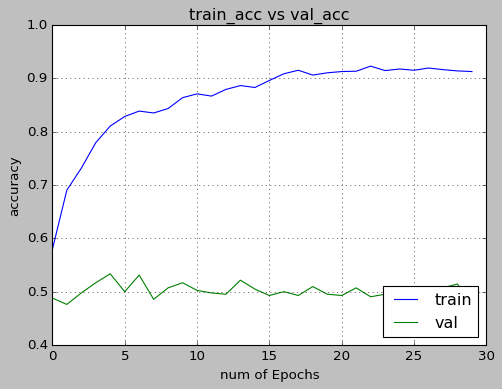

In [20]:
epochs = 30
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

**Confusion Matrix**

Found 418 images belonging to 2 classes.
418/418 [==============================] - 8s 17ms/step


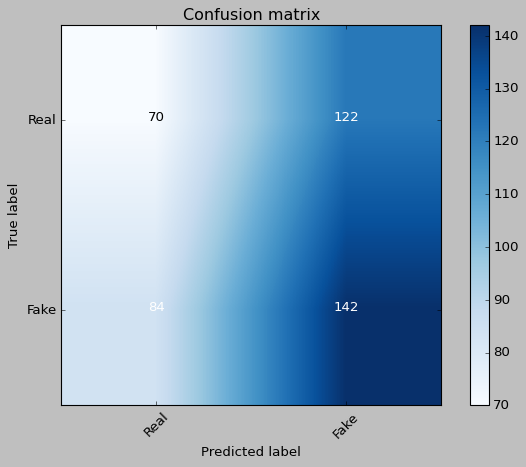

In [21]:
# evaluate the model on test data
test_data = data_with_aug.flow_from_directory(dataset_path,
                                               class_mode="binary",
                                               target_size=(224, 224),
                                               batch_size=1,
                                               shuffle=False,
                                               subset="validation")

y_true = test_data.labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# plot the confusion matrix
classes = ['Real', 'Fake']
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()


**Saving the Model**

In [22]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/saved_models/model.h5')

**Loading the Model and prediction with plotting**

Saving hard_237_0010.jpg to hard_237_0010.jpg
1/1 [==============================] - 1s 719ms/step
Predicted Class (0 - Real , 1- Fake):  1


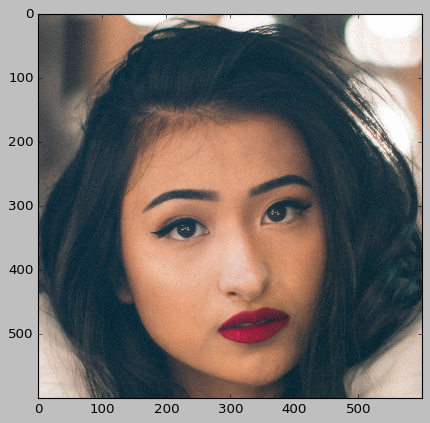

In [24]:
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
uploaded = files.upload()
if len(uploaded) > 0:
    image_path = list(uploaded.keys())[0]
    testImage = mpimg.imread(image_path)
    plt.imshow(testImage)
    model = load_model('/content/drive/MyDrive/saved_models/model.h5')
    image = load_img(image_path, target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1, 224, 224, 3)
    label = model.predict(img)

    def Predicted_value():
        if label[0][0] <= 0.5:
            return 0
        else:
            return 1

    print("Predicted Class (0 - Real , 1- Fake): ", Predicted_value())
else:
    print("No image uploaded.")
